In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = joblib.load('/content/dataset_clean.pkl')
df.sample()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
1489,2021-06-05,DKI5 (Kebon Jeruk) Jakarta Barat,57,-1,24,15,21,29,57,PM10,BAIK


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1809 entries, 0 to 1824
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   1809 non-null   datetime64[ns]
 1   stasiun   1809 non-null   object        
 2   pm10      1809 non-null   int64         
 3   pm25      1809 non-null   int64         
 4   so2       1809 non-null   int64         
 5   co        1809 non-null   int64         
 6   o3        1809 non-null   int64         
 7   no2       1809 non-null   int64         
 8   max       1809 non-null   int64         
 9   critical  1809 non-null   object        
 10  categori  1809 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 169.6+ KB


## 1. Stasiun dengan polusi terburuk dan baik

In [4]:
df['categori'].value_counts()

BAIK           1537
TIDAK SEHAT     272
Name: categori, dtype: int64

In [5]:
df_buruk = df[df['categori'] == 'TIDAK SEHAT']
df_baik = df[df['categori'] == 'BAIK']

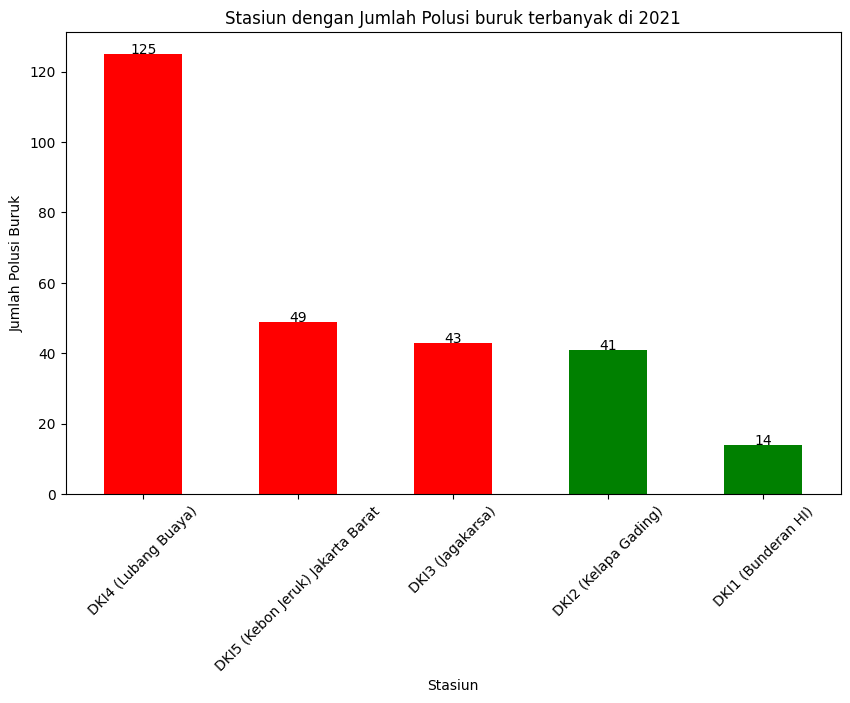

In [6]:
stasiun_counts = df_buruk['stasiun'].value_counts().sort_values(ascending=False)

# Plotting barchart
plt.figure(figsize=(10, 6))
colors = ['red' if count >= stasiun_counts.median() else 'green' for count in stasiun_counts]
stasiun_counts.plot(kind='bar', color=colors)

# Customizing plot
plt.xlabel('Stasiun')
plt.ylabel('Jumlah Polusi Buruk')
plt.title('Stasiun dengan Jumlah Polusi buruk terbanyak di 2021')
plt.xticks(rotation=45)

# Menampilkan nilai di atas setiap bar
for i, value in enumerate(stasiun_counts):
    plt.text(i, value, str(value), ha='center')

plt.show()

## 2. Kandungan apa saja yang paling berkorelasi untuk menjadi polusi

In [8]:
df.sample()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
1417,2021-06-23,DKI2 (Kelapa Gading),66,91,51,13,51,28,91,PM25,BAIK


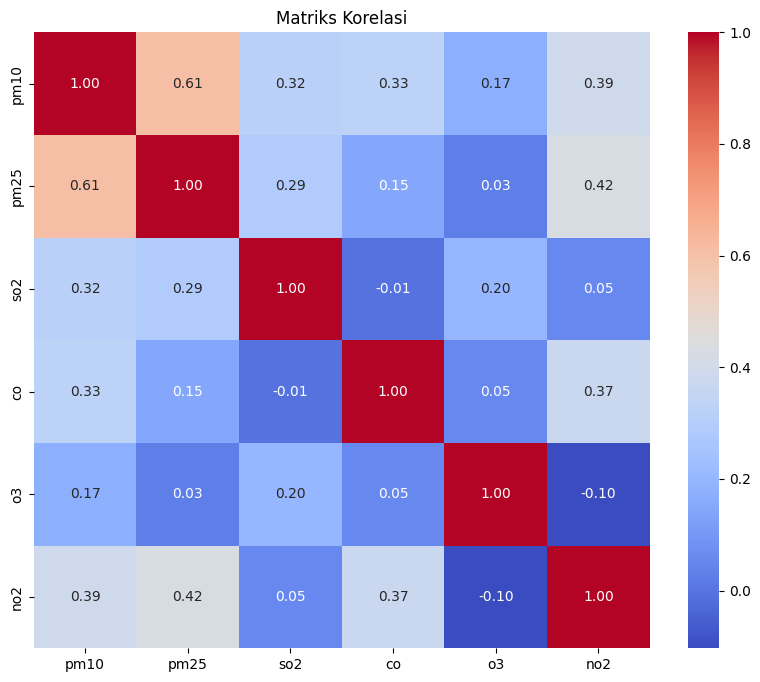

In [9]:
columns_to_analyze = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

correlation_matrix = df[columns_to_analyze].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title('Matriks Korelasi')
plt.show()

In [10]:
df['categori'].value_counts()

BAIK           1537
TIDAK SEHAT     272
Name: categori, dtype: int64

## 3. Perbandingan kandungan yang ada pada polusi baik dan polusi tidak sehat

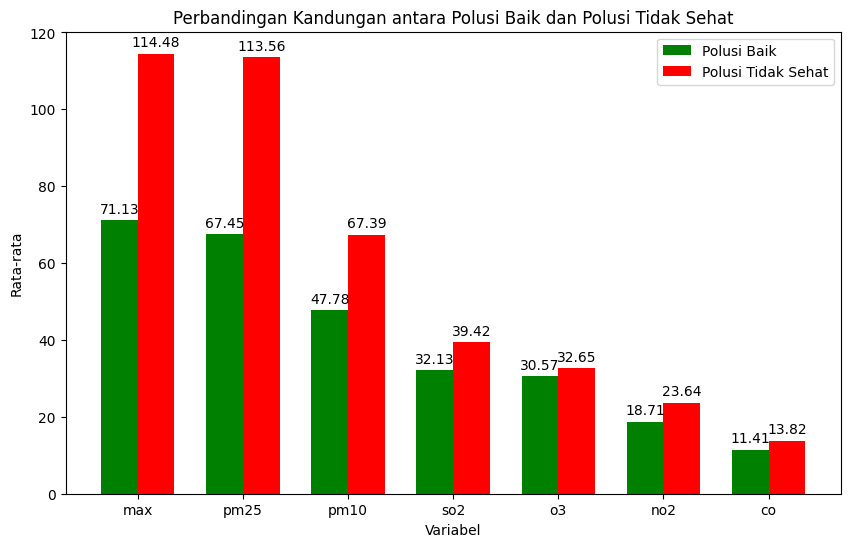

In [11]:
describe_baik = df_baik.describe()
describe_tidak_sehat = df_buruk.describe()

# Ambil nilai rata-rata untuk membandingkan
rata_rata_baik = describe_baik.loc['mean']
rata_rata_tidak_sehat = describe_tidak_sehat.loc['mean']

# Urutkan nilai rata-rata dari terbesar ke terkecil
rata_rata_baik = rata_rata_baik.sort_values(ascending=False)
rata_rata_tidak_sehat = rata_rata_tidak_sehat.sort_values(ascending=False)

# Mengatur posisi x untuk barplot
x = np.arange(len(rata_rata_baik))

# Mengatur lebar barplot
width = 0.35

# Plotting visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rata_rata_baik, width, color='green', label='Polusi Baik')
rects2 = ax.bar(x + width/2, rata_rata_tidak_sehat, width, color='red', label='Polusi Tidak Sehat')

# Customizing plot
ax.set_xlabel('Variabel')
ax.set_ylabel('Rata-rata')
ax.set_title('Perbandingan Kandungan antara Polusi Baik dan Polusi Tidak Sehat')
ax.set_xticks(x)
ax.set_xticklabels(rata_rata_baik.index)
ax.legend()

# Menambahkan label nilai di atas setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

## 4. Trend Polusi ditahun 2021

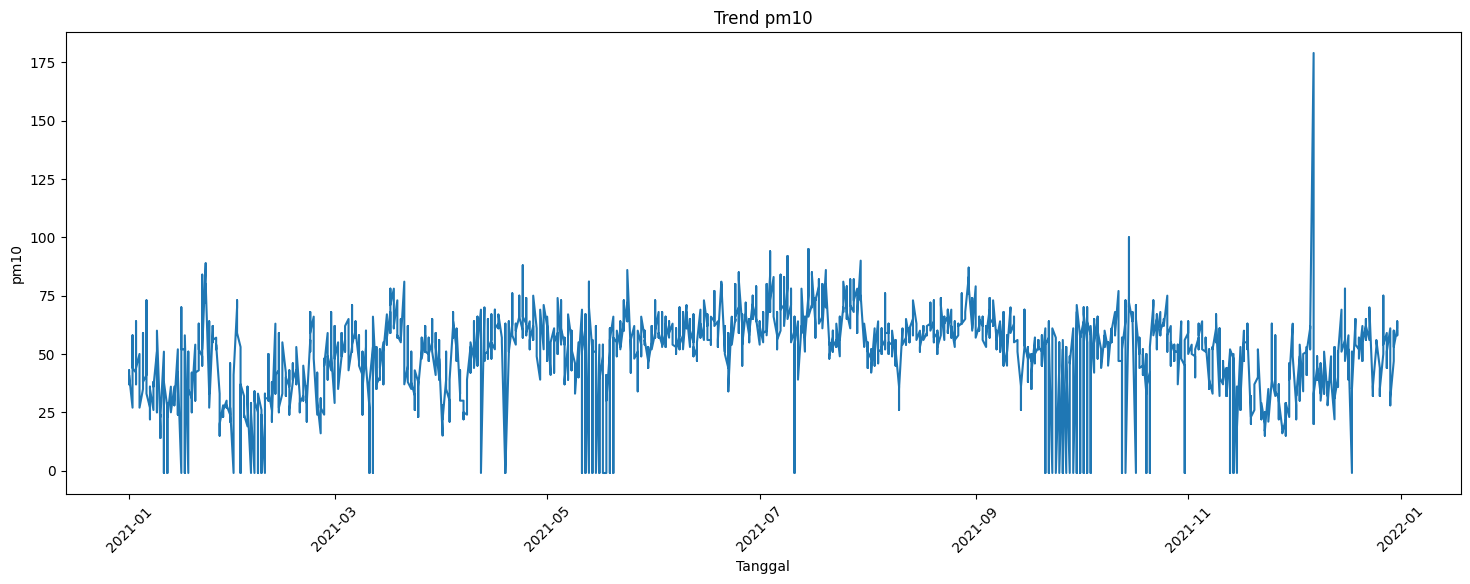

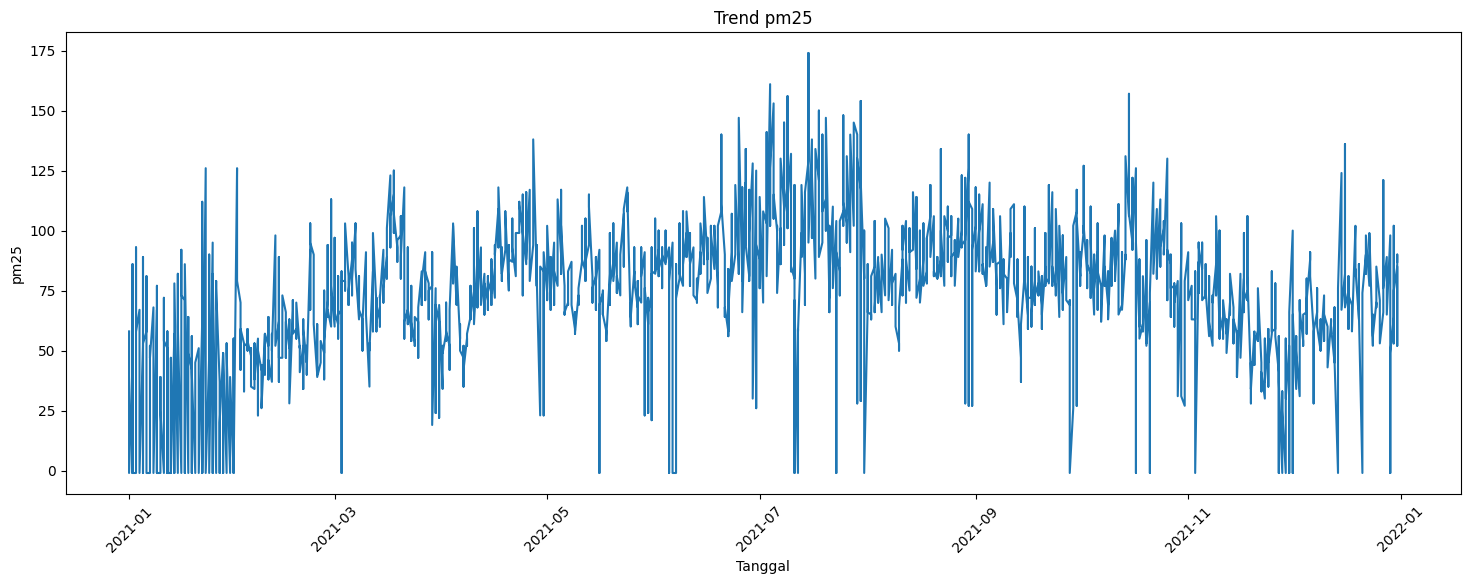

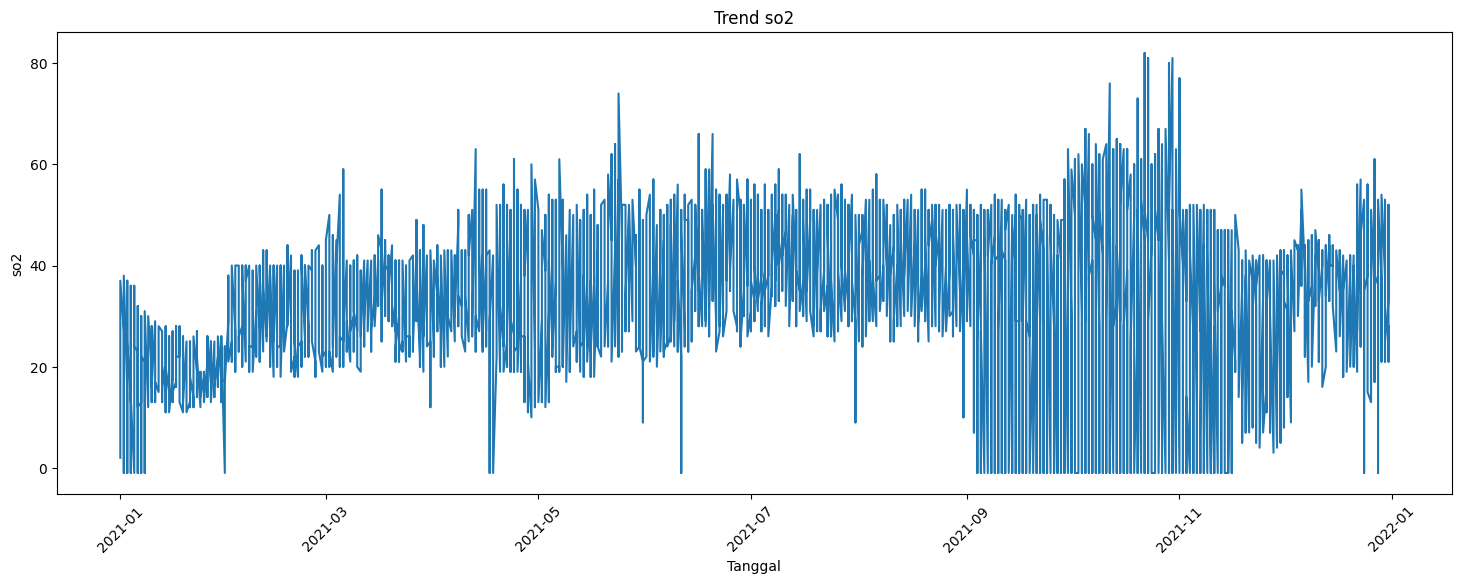

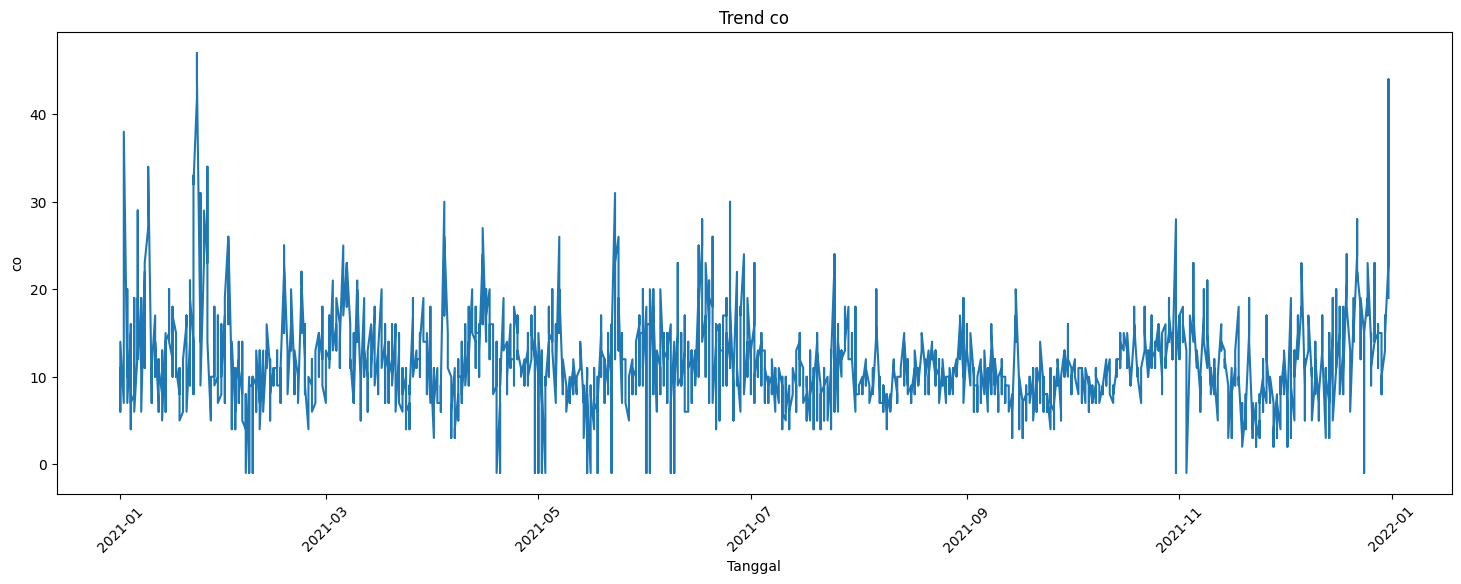

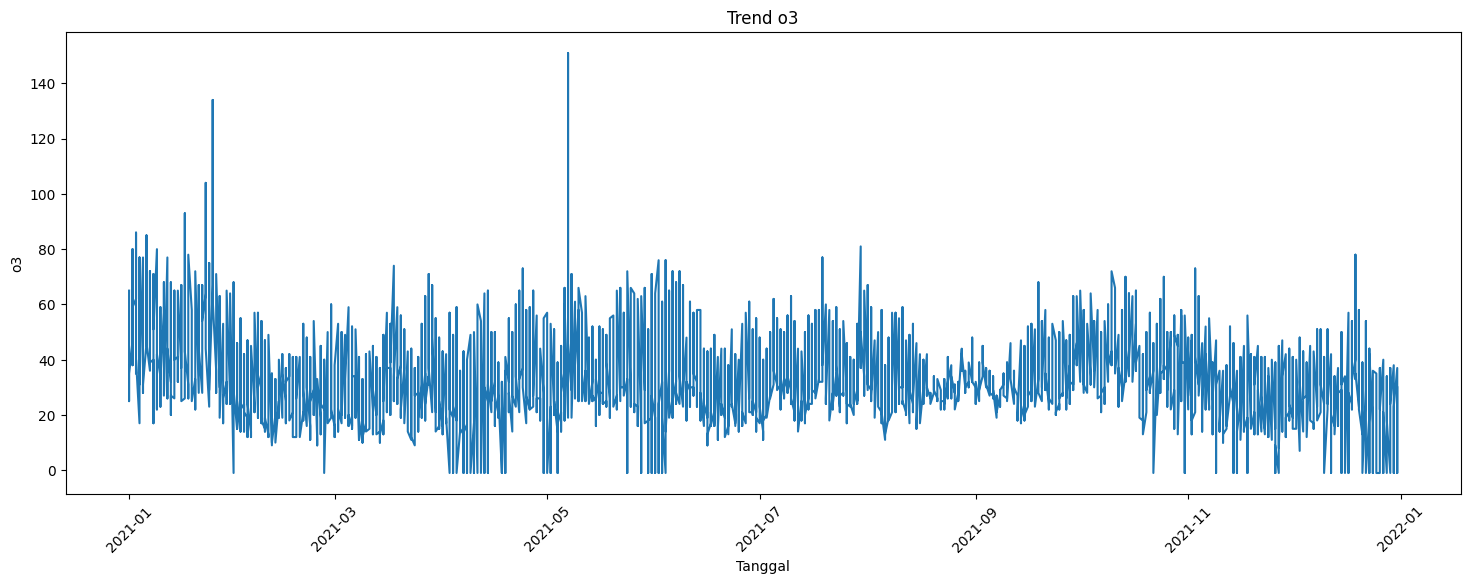

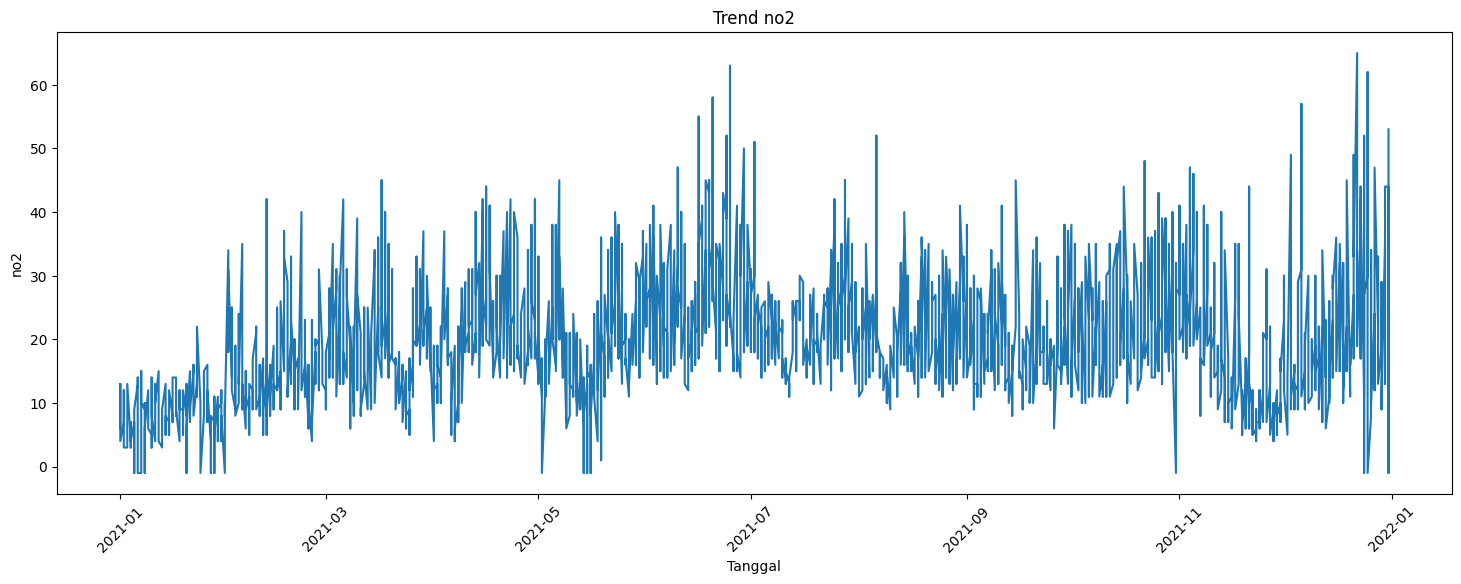

In [16]:
# Pilih kolom-kolom yang ingin ditampilkan dalam trend
columns_to_plot = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

# Membuat trend plot untuk setiap kolom
for column in columns_to_plot:
    plt.figure(figsize=(18, 6))
    plt.plot(df['tanggal'], df[column])
    plt.xlabel('Tanggal')
    plt.ylabel(column)
    plt.title('Trend ' + column)
    plt.xticks(rotation=45)
    plt.show()